### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [1]:
%matplotlib notebook

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the mouse data and the study results
mouse_df = pd.read_csv('../Resources/Mouse_metadata.csv')
study_df = pd.read_csv('../Resources/Study_results.csv')

In [5]:
# Display the mouse data
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# Display the study data
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset and display it
merge_df = pd.merge(mouse_df, study_df, on='Mouse ID', how='outer')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df['Mouse ID'][merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)].unique()

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Generating the Boxplot

In [15]:
# Determine the final timepoint for each mouse.
grouped_data = clean_df[['Mouse ID', 'Timepoint']].groupby(['Mouse ID'])
# grouped_data.head()

# Start by getting the greatest timepoint for each mouse
maxtimepoint_df = grouped_data.max().reset_index()
maxtimepoint_df.head()
# maxtimepoint_df = maxtimepoint_df.rename(columns={"Timepoint": "Maximum Timepoint"})

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [16]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
merge_df = pd.merge(clean_df, maxtimepoint_df, on=['Mouse ID','Timepoint'], how='inner')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
# Create a list with all 10 drug regimens.
drug_l = list(mouse_df['Drug Regimen'].unique())

# Create a empty list to fill with the tumor vol data
tumorfill_l = []

for drug in drug_l:
# Isolate (filter) each mice on each drug to collect their tumor volume.
    # Locate the rows which match the drug and get the final tumor volumes of all mic
    # Append the outcome to the empty list previously created.
    tumorfill_l.append(merge_df.loc[merge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'])

<IPython.core.display.Javascript object>


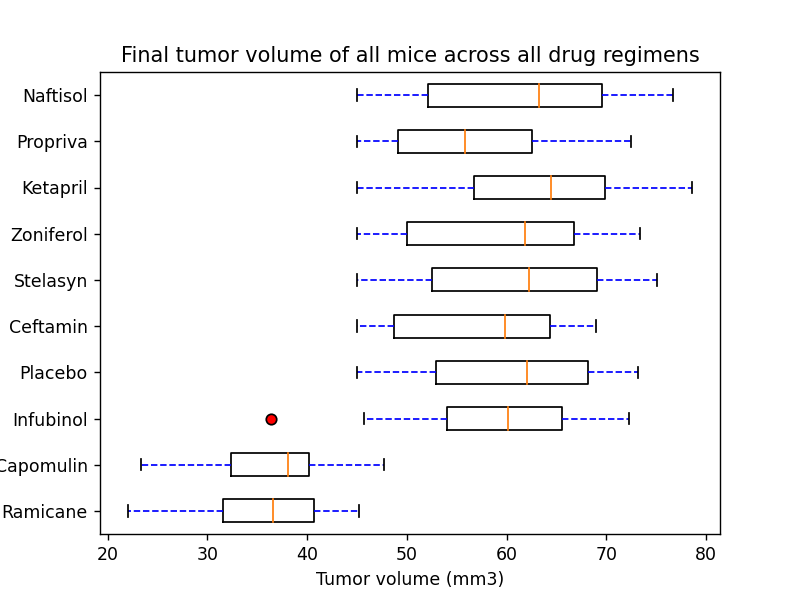

Text(0.5, 1.0, 'Final tumor volume of all mice across all drug regimens')

In [36]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.
# Define a custom shape for all outliers in the visualization
outliers = dict(markerfacecolor='r', marker='o')
whisker = dict(color='b',ls='--')
# Create horizontal box and whisker plot
plt.boxplot(tumorfill_l, labels=drug_l, vert=False, flierprops=outliers, whiskerprops=whisker)
plt.xlabel('Tumor volume (mm3)')
plt.title('Final tumor volume of all mice across all drug regimens')

In [40]:
tumorfill_l[0].quantile([.25,.5,.75])

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

In [41]:
tumorfill_l[0].mean()

36.1913904284

In [39]:
drug_l

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']